# **Stochastic modeling approach based on Monte Carlo methods**

**MOD510: Project 4**

Date: **Desember 1st 2025**

Names: *Malvin Varpe & Torgrim Odde*

**Learning objectives:**
* Understand the principles of Monte Carlo methods and their application in stochastic modelling.
* Develop skills in formulating and solving mass balance equations for single and interconnected systems.
* Quantify uncertainties in simulation results and interpret their implications for system behaviour.
* Compare stochastic simulation outcomes to deterministic ODE solutions, critically analysing their performance and limitations.
* Gain hands-on experience with computational tools for solving engineering problems.

# Astract 


# Introduction


# Exercise 1 - Stochastic modeling of mixing tanks
**Part 1: Single Mixing Tank with Parameter Uncertainty**

**Description:** Explore the effect of parameter uncertainty on contaminant concentration in a single mixing tank using Monte Carlo simulations. Assume that the tank volume remains constant throughout all simulations, even when inflow and outflow rates vary.

1. Derive and solve the governing equation for the solute concentration over
time:
$$\frac{dC}{dt} = \frac{Q_{in}}{V} C_{in} - \frac{Q_{out}}V C,$$
where $C$ is the solute concentration in the tank, $C_{in}$ is the solute concentration of the inflow, $Q_{in}$ and $Q_{out}$ are the inflow and outflow rates, and $V$ is the tank volume (constant).


We consider a perfectly mixed tank of constant volume $V$, with mixture entering and leaving but no reactions.

Total mass of the mix in the tank is: 
$$M(t) = C(t)V$$
A mass balance on the mix gives:
$$\frac{dM}{dt} = inflow\;of\;mass - outflow\;of\;mass$$
$$\frac{d}{dt}[C(t)V]=Q_{in}C_{in}-Q_{out}C(t)$$
Since V is constant:
$$V\frac{dC}{dt}=Q_{in}C_{in}-Q_{out}C$$
$$\to \frac{dC}{dt}=\frac{Q_{in}}{V}C_{in}-\frac{Q_{out}}{V}C$$
Which matches the given governing equation.

Then, we can solve the ODE;
$$\frac{dC}{dt}+\frac{Q_{out}}{V}C=\frac{Q_{in}}{V}C_{in}$$
This is a first-order linear ODE of the form:
$$\frac{dC}{dt}+kC=S,\;where\;k=\frac{Q_{out}}{V}\;and\;S=\frac{Q_{in}}{V}C_{in}$$
With the integrating factor $\mu(t)=e^{kt}$.

Then, multiplying the ODE with the integrating factor yields:
$$e^{kt}\frac{dC}{dt}+ke^{kt}C=Se^{kt}$$
Integrate:
$$e^{kt}C=\frac{S}{k}e^{kt}+C_1$$
Divide by $e^{kt}$:
$$C(t)=\frac{S}{k}+C_1e^{-kt}$$
We can then substitute back:
$$\frac{S}{k}=\frac{\frac{Q_{in}}{V}C_{in}}{\frac{Q_{out}}{V}} = \frac{Q_{in}C_{in}}{Q_{out}}$$
And define the steady-state concentration:
$$C_{ss} = \frac{Q_{in}C_{in}}{Q_{out}}$$
And by applying the initial condition $C(0)=C_0$:
$$C_0=C_{ss}+C_1 \to C_1=C_0-C_{ss}$$
We can get the final solution:
$$C(t)=C_{ss}+(C_0-C_{ss})\exp{(-\frac{Q_{out}}{V}t)},\;where\;C_{ss}=\frac{Q_{in}C_{in}}{Q_{out}}$$
The solution shows that $C(t)$ approaches steady-state concentration $C_{ss}=\frac{Q_{in}C_{in}}{Q_{out}}$ exponentially with a time scale $\tau=\frac{V}{Q_{out}}$.

2. **Analytical Solution with Average Parameters:** Compute the analytical solution of the single-tank problem using the average values of the parameters:
* $\bar{V} = 1000$ liters
* $\bar{Q} _{out} = 100$ L/s
* $\bar{Q}_{in} = 100$ L/s
* $\bar{C}_{in} = 0.25$ g/L
* $\bar{C}(0) = 3.5$ g/L

Derive the concentration as a function of time using these average parameters.

The steady-state concentration is 
$$C_{ss}=\frac{\bar{Q}_{in}\bar{C}_{in}}{\bar{Q}_{out}}=\frac{100*0.25}{100}=0.25\;g/L$$
So here, $C_{ss}=C_{in}$ as expected when $Q_{in}=Q_{out}$.

The decay rate is
$$\frac{\bar{Q}_{out}}{\bar{V}}=\frac{100}{1000}=0.1s^{-1}$$
So the exponential term becomes $\exp(-0.1t)$
With the initial concentration of $C_0=\bar{C}(0)=3.5\;g/L$ we can insert this into the general solution and get
$$C(t)=C_{ss}+(C_0-C_{ss})\exp(-\frac{\bar{Q}_{out}}{\bar{V}}t)=0.25+(3.5-0.25)\exp(-0.1t)=3.5-0.25=3.25$$
Therefore, the final expression is:
$$C(t)=0.25+3.25\exp(-0.1t)\;g/L$$

Using the analytical solution derived in question 1, and substituting the average parameter values, we obtain the cocnentration as a function of time.

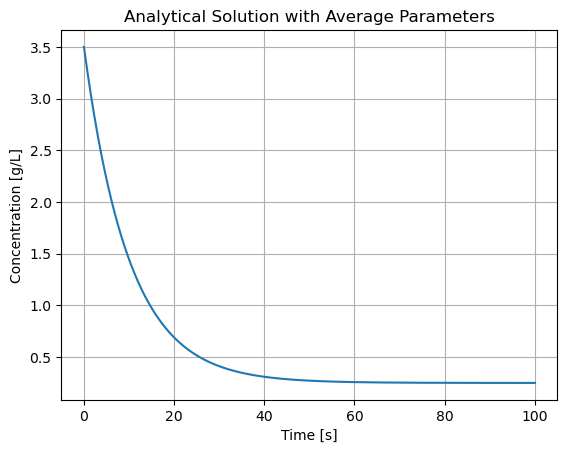

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 100, 400)
C = 0.25 + 3.25 * np.exp(-0.1 * t)

plt.plot(t, C)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Analytical Solution with Average Parameters")
plt.grid(True)
plt.show()

The plot shows the analytical concentration curve using the average parameter  values. As expected for a continuous stirred tank with $Q_{in}=Q_{out}$, the concentration decreases exponentially from the initial value of $C_0=3.5\;g/L$ towards the steady-state concentration $C_{ss}=0.25\;g/L$ with a decay rate of $\frac{Q}{V}=0.1s^{-1}$.

3. Assume that the probability of a gram of fluid to leave the tank over a given time interval $Δt$ is
$$p=1-e^{-\frac{Q_{out}}{V} \Delta t}$$

# [Se på denne]
Oppgaven spør ikke om noe? Men burde vi forklare hva dette betyr selv om? Denne sannsynligheten p er en forutsetning man kan bruke, men vi bruker Monte Carlo i de neste oppgavene istedenfor. Her er et forslag til et svar/kommentar:

Because the tank is perfectly mixed, each gram of fluid has an equal chance of being in the outflow stream. The probability that a given gram remains in the tank during a time interval $\Delta t$ follows an exponential survival law with rate $\frac{Q_{out}}{V}$. Therefore, the probability that it leaves during $\Delta t$ is $p$, as expressed in the function above.

The expression for $p$ is consistent with the ODE formulations, since the exponential survival probability is mathematically equivalent to the decay term in $\frac{dC}{dt}=-\frac{Q_{out}}{V}C$.

In our Monte Carlo simulations, we use the ODE-based Euler update rather than a particle-removal scheme based directly on $p$ because the project requires uncertainty propagation in the model parameters, not stochastic particle tracking. Either way, the probability expression $p$ gives physical understanding of the exponential loss term in the governing equation.

4. **Monte Carlo Simulation – Option 1 (Fixed Parameters per Run):**
Perform a Monte Carlo simulation where parameters are sampled once at the beginning of each run and remain constant throughout the run. Use the following uniform distributions:
* $V ∼ Uniform(950, 1050)$ liters
* $Q_{out} = Q_{in} ∼ Uniform(95, 105)$ L/s
* $C_{in} = 0$ g/L
* $C(0) ∼ Uniform(3.4, 3.6)$ g/L

Simulate 1000 time steps for each run and perform 100 independent runs.
Compute:
* Mean concentration across runs
* Standard deviation
* 95% confidence intervals

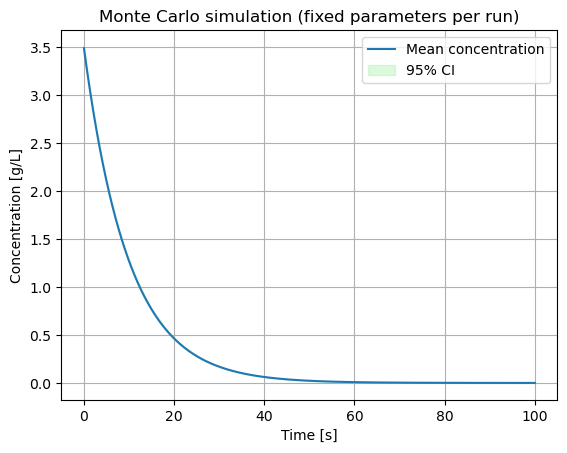

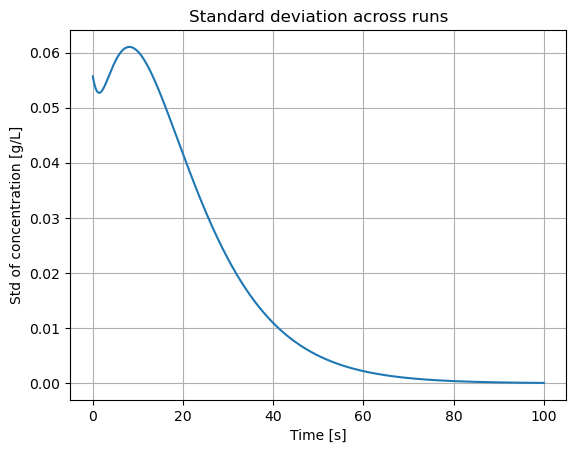

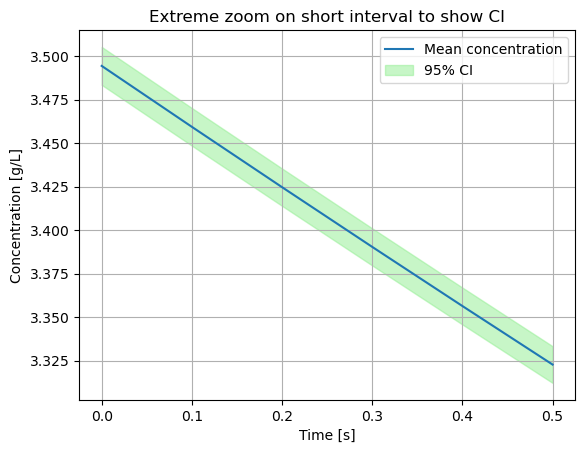

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1  # time step [s], so total time = 100 s
t = np.arange(n_steps + 1) * dt

# Sample parameters (one set per run)
V = np.random.uniform(950.0, 1050.0, size=n_runs)
Q = np.random.uniform(95.0, 105.0, size=n_runs)
C0 = np.random.uniform(3.4, 3.6, size=n_runs)
Cin = 0.0

# Allocate array for concentrations: shape (n_runs, n_steps+1)
C = np.zeros((n_runs, n_steps + 1))
C[:, 0] = C0

# Explicit Euler simulation
factor = 1.0 - (Q / V) * dt
for n in range(n_steps):
    C[:, n+1] = C[:, n] * factor

# Compute statistics across runs at each time step
C1_mean = C.mean(axis=0)
C1_std = C.std(axis=0, ddof=1)
N = n_runs
C1_sem = C1_std / np.sqrt(N)
C1_lower = C1_mean - 1.96 * C_sem
C1_upper = C1_mean + 1.96 * C_sem

# Plot mean and CI
plt.figure()
plt.plot(t, C_mean, label="Mean concentration")
plt.fill_between(t, C1_lower, C1_upper, color='lightgreen',alpha=0.3, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Monte Carlo simulation (fixed parameters per run)")
plt.legend()
plt.grid(True)
plt.show()

# Plot STD vs time
plt.figure()
plt.plot(t, C_std)
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation across runs")
plt.grid(True)
plt.show()

# Showing extreme zoom of limited time period
plt.figure()
mask = t <= 0.5  # first 0.5 seconds
plt.plot(t[mask], C1_mean[mask], label="Mean concentration")
plt.fill_between(t[mask], C1_lower[mask], C1_upper[mask], color='lightgreen',alpha=0.5, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Extreme zoom on short interval to show CI")
plt.legend()
plt.grid(True)
plt.show()


The Monte Carlo simulation was performed with 100 independent runs and 1000 time steps per run. Because parameters are sampled once per run and kept constant throughout, each trajectory follows an exponential decay towards zero, as expected. The combined mean therefore also decays exponentially.

The behavior of the standard deviation is a bit different. Initially it decreases because all concentrations begin to decay simultaneously, reducing the overall spread. It then increases slightly because different runs decay at slightly different rates, causing trajectories to diverge and temporarily increase the variability. Once the decay dominates and all concentrations approach zero, the standard deviations collapses exponentially. 
At $t=0$, the variations is due solely to the uncertainty of the initial concentration $C(0)$, which is sampled from a uniform distribution over $[3.4,3.6]$ g/L. As soon as the simulation begins, an additional source of variability appear: each run decays at a different rate $\lambda_i = \frac{Q_i}{V_i}$, because both $Q$ and $V$ vary across runs. These slightly different decay rates cause the concentration trajectories to separate from one another during the early stages of the simulations. As a result, the standard deviation initially decreases more slowly than a pure exponential because two sources of variability (initial concentration vs. decay rate) are competing. As time increases, the dynamics become dominated by the exponential decay term itself. All trajectories shrink toward zero, regardless of their initial values or decay rates, causing the concentrations to collapse toward a common value. This leads to a clean exponential decline in the standard deviation, eventually approaching zero.

Due to the narrow parameter ranges and the relatively large number of runs (N=100), the 95% confidence intervals of the mean concentration are extremely narrow and visually undistinguishable from the mean curve on the original plot. To show that it is there, we reproduce a second plot with an extreme zoom. This is just for visualization and verification.

5. **Monte Carlo Simulation – Option 2 (Parameters Vary at Each Time Step):** Repeat the simulation, but now allow parameters to fluctuate at every time step to represent dynamic variability. For each time step, resample:
* $Q_{in} = Q_{out} ∼ Uniform(95, 105)$ L/s
* $C_{in} = 0$ g/L
  
Keep $V$ and $C(0)$ fixed per run. Compare the uncertainty in concentration between Option 1 and Option 2.

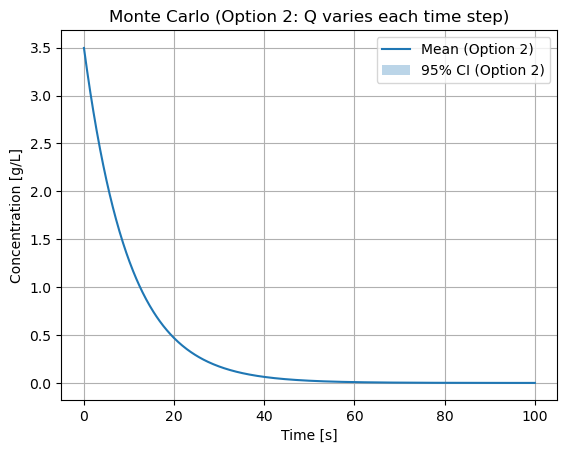

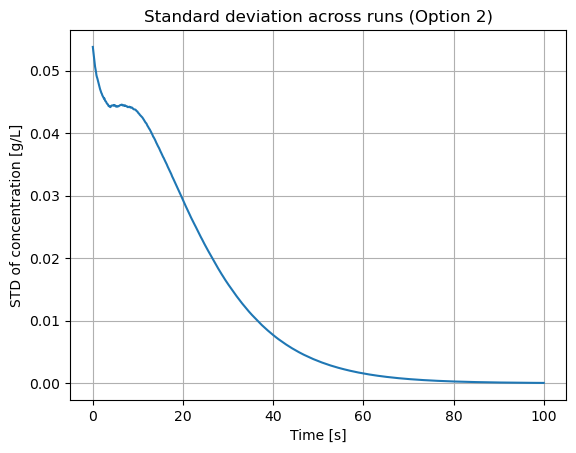

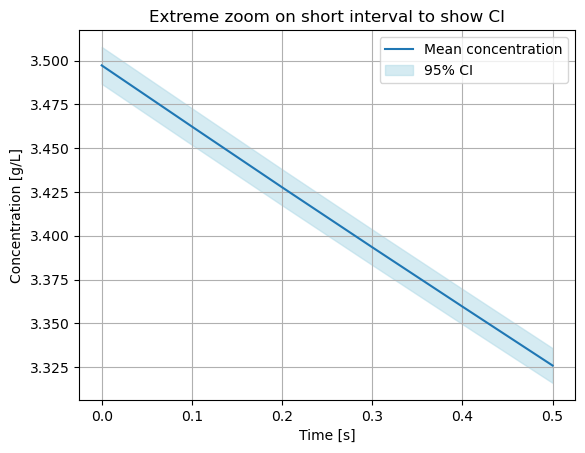

In [28]:
import numpy as np
import matplotlib.pyplot as plt

"""
Now, we aim to set up the Monte Carlo with time varying Q.
V and C(0) are still sampled once per run and kept fixed, but at every step we
resample Q_in = Q_out ~U(95,105) L/s, C_in = 0.
The decay rate will therefore becore a random process in time.
We still use the same ODE and explicit Euler.
"""
# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1
t = np.arange(n_steps + 1) * dt

# Parameters: V and C0 fixed per run
V2 = np.random.uniform(950.0, 1050.0, size=n_runs)
C0_2 = np.random.uniform(3.4, 3.6, size=n_runs)
Cin = 0.0

# Allocate concentrations for Option 2
C2 = np.zeros((n_runs, n_steps + 1))
C2[:, 0] = C0_2

# Time-varying Q at each time step
for n in range(n_steps):
    Q_step = np.random.uniform(95.0, 105.0, size=n_runs)   # new Q for this time step
    factor_step = 1.0 - (Q_step / V2) * dt
    C2[:, n+1] = C2[:, n] * factor_step

# Statistics across runs for Option 2
C2_mean = C2.mean(axis=0)
C2_std  = C2.std(axis=0, ddof=1)
N = n_runs
C2_sem  = C2_std / np.sqrt(N)
C2_lower = C2_mean - 1.96 * C2_sem
C2_upper = C2_mean + 1.96 * C2_sem

# Mean + 95% CI
plt.figure()
plt.plot(t, C2_mean, label="Mean (Option 2)")
plt.fill_between(t, C2_lower, C2_upper, alpha=0.3, label="95% CI (Option 2)")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Monte Carlo (Option 2: Q varies each time step)")
plt.legend()
plt.grid(True)
plt.show()

# STD vs time
plt.figure()
plt.plot(t, C2_std)
plt.xlabel("Time [s]")
plt.ylabel("STD of concentration [g/L]")
plt.title("Standard deviation across runs (Option 2)")
plt.grid(True)
plt.show()

# Showing extreme zoom of limited time period
plt.figure()
mask = t <= 0.5  # first 0.5 seconds
plt.plot(t[mask], C2_mean[mask], label="Mean concentration")
plt.fill_between(t[mask], C2_lower[mask], C2_upper[mask], color='lightblue',alpha=0.5, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Extreme zoom on short interval to show CI")
plt.legend()
plt.grid(True)
plt.show()

In option 2, the Monte Carlo simulations was repeated with the same number of runs (100) and time steps (1000), but with the outflow/inflow rate $Q(t)$ resampled from a uniform distribution $[95, 105]$ L/s at every time step. The tank volume $V$ and the initial concentration $C(0)$ are still sampled once per run and remain fixed. 

The mean concentration across runs show the same behavior: an exponential decay toward zero. This is still as expected since the governing equation still describesa first-order removal process and the small fluctuations in $Q(t)$ even out over the group.

Now, the we see that the STD differs from option 1. At $t=0$, the STD again reflects only the spread in the initial concentration $C(0)$. As the simulation progresses, the variability in the time-dependent decay rate $\lambda(t)=\frac{Q(t)}{V}$ introduce an additional source of randomness. Because each trajectory experiences a difference sequence of flow values, the runs diverge in a more irregular manner than for option 1. Either way, since $V$ is fixed per run and $Q(t)$ fluctuates within a narrow interval, the variability introduced by these fluctutations remain relatively small.
Therefore, the STD for option 2 shows a smoother early-time behavior and a lower peak. This is because the uncertainty is now dominated by the random differences in $Q(t)$ at each time step, rather than fixed differences in decay rates across runs. As time increases, the decay term again dominate the dynamics and all concentrations shrink to zero, again forcing the STD to collapse exponentially.

The 95% CI around the mean is again extremely narrow. To visualize it, we zoom in on a very small time interval (0.5) just to confirm its presence.

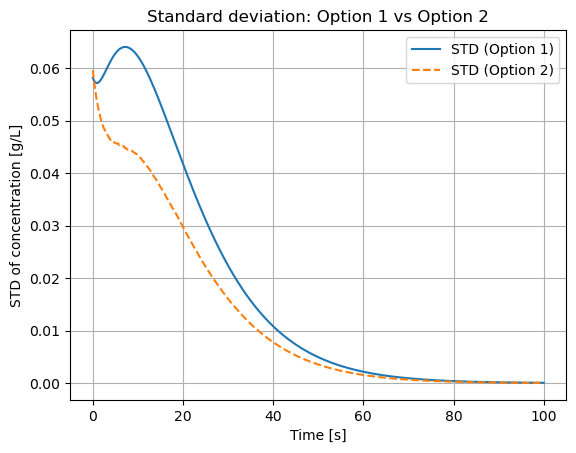

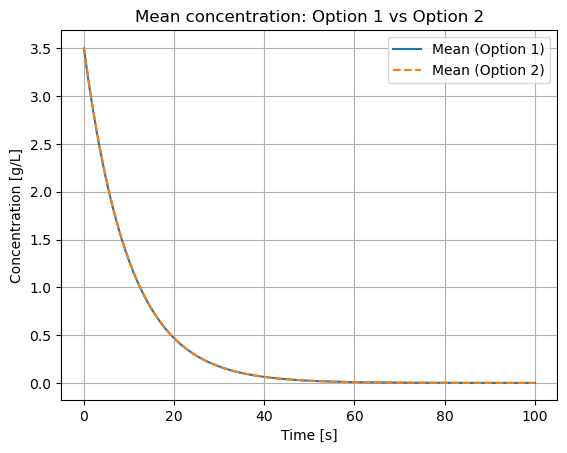

In [27]:
# Comparison of STD, CI and Mean Concentration for Option 1 and 2
plt.figure()
plt.plot(t, C1_std, label="STD (Option 1)")
plt.plot(t, C2_std, label="STD (Option 2)", linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("STD of concentration [g/L]")
plt.title("Standard deviation: Option 1 vs Option 2")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, C1_mean, label="Mean (Option 1)")
plt.plot(t, C2_mean, label="Mean (Option 2)", linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Mean concentration: Option 1 vs Option 2")
plt.legend()
plt.grid(True)
plt.show()


The comparison plots show that the mean concentration is visually identical for the two simulation options. This confirms that allowing $Q(t)$ to fluctuate at each time step does not significantly affect the expected concentration trajectory, because the decay mechanism is linear and $C_{in}=0$, causing randomness in $Q(t)$ to average out.

The largest difference appear in the standard deviation as meantioned.
* Option 1 (fixed paramters per run) shows a more distinct early-time peak in STD.
* Option 2 (time-varying parameters) shows a smoother and lower STD curve.
At long times, both options sho the concentrations decay toward zero.

**Part 2: Three Interconnected Tanks with Parameter Uncertainty**

**Description:** Extend the model to a system of three interconnected tanks with inflows, outflows, and interconnecting flow between tanks. Assume that the volume of each tank remains constant throughout all simulations.

1. **Formulate the System of Equations:** Write the governing equations
for the solute concentrations in all three tanks:

$$\frac{dC_1}{dt}=\frac{Q_{in}}{V}C_{in} - \frac{Q_{out}}{V}C_1$$
$$\frac{dC_2}{dt}=\frac{Q_{in}}{V}C_{1} - \frac{Q_{out}}{V}C_2$$
$$\frac{dC_3}{dt}=\frac{Q_{in}}{V}C_{2} - \frac{Q_{out}}{V}C_3$$

Similar to part 1, but with a three-tank setup.

Mass in tank 1: $M_1=C_1V$
$$\frac{d}{dt}(C_1V)=QC_{in}-QC_1$$
Since $V$ is constant:
$$V\frac{dC_1}{dt}=QC_{in}-QC_1 \to \frac{dC_1}{dt}=\frac{Q}{V}C_{in}-\frac{Q}{V}C_1$$
which matches
$$\frac{dC_1}{dt}=\frac{Q_{in}}{V}C_{in}-\frac{Q_{out}}{v}C_1$$

Mass in tank 2: $M_2=C_2V$
Inflow no has concentration $C_1$:
$$\frac{d}{dt}(C_2V)=QC_1-QC_2$$
$$V\frac{dC_2}{dt}=QC_1-QC_2 \to \frac{dC_2}{dt}=\frac{Q}{V}C_1-\frac{Q}{V}C_2$$
which matches
$$\frac{dC_2}{dt}=\frac{Q_{in}}{V}C_1-\frac{Q_{out}}{V}C_2$$

Mass in tank 3: $M_3=C_3V$
Inflow now has concentration $C_2$
$$\frac{d}{dt}(C_3V)=QC_1-QC_3$$
$$V\frac{dC_3}{dt}=QC_2-QC_3 \to \frac{dC_3}{dt}=\frac{Q}{V}C_2-\frac{Q}{V}C_3$$
which matches
$$\frac{dC_3}{dt}=\frac{Q_{in}}{V}C_2-\frac{Q_{out}}{V}C_3$$

So the governing system is exacly:
$$\frac{dC_1}{dt}=\frac{Q_{in}}{V}C_{in}-\frac{Q_{out}}{v}C_1$$
$$\frac{dC_2}{dt}=\frac{Q_{in}}{V}C_1-\frac{Q_{out}}{V}C_2$$
$$\frac{dC_3}{dt}=\frac{Q_{in}}{V}C_2-\frac{Q_{out}}{V}C_3$$

2. **Monte Carlo Simulation (Fixed Parameters per Run):** Perform a
Monte Carlo simulation where parameters are sampled once at the beginning of each run and remain constant throughout the run:
* $V ∼ Uniform(950, 1050)$ liters
* $Q_{in} = Q_{out} ∼ Uniform(95, 105)$ L/s
* $C_{in} = 0$ g/L
* Initial concentrations:
    * $C_1(0) ∼ Uniform(3.4, 3.6)$ g/L,
    * $C_2(0),C_3(0) ∼ Uniform(0, 0.1)$ g/L.

Simulate 1000 time steps for each run and perform 100 independent runs.
Compute mean, standard deviation, and confidence intervals for all three tanks.

Doing the same as for part 1, but in vector form for the Monte Carlo three tanks using initial conditions derived above, explicit Euler and time step Δt as shown below:
$$C_x^{n+1} = C_x^n+\Delta t(-\frac{Q}{V}C_x^n)=C_x^n(1-\frac{Q}{V}\Delta t)\; for\; x=[1,2,3]$$



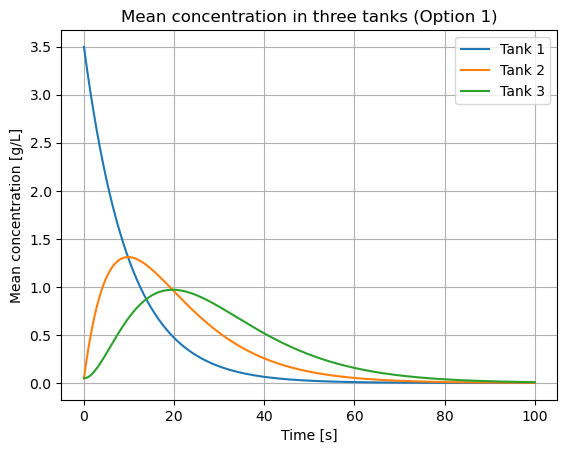

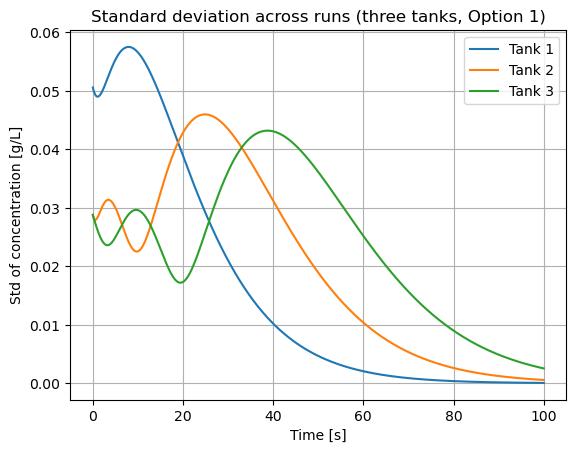

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1
t = np.arange(n_steps + 1) * dt

# Sample parameters (fixed per run)
V = np.random.uniform(950.0, 1050.0, size=n_runs)
Q = np.random.uniform(95.0, 105.0, size=n_runs)
Cin = 0.0
C1_0 = np.random.uniform(3.4, 3.6, size=n_runs)
C2_0 = np.random.uniform(0.0, 0.1, size=n_runs)
C3_0 = np.random.uniform(0.0, 0.1, size=n_runs)

# Allocate concentration arrays: shape (n_runs, n_steps+1)
C1 = np.zeros((n_runs, n_steps + 1))
C2 = np.zeros((n_runs, n_steps + 1))
C3 = np.zeros((n_runs, n_steps + 1))

C1[:, 0] = C1_0
C2[:, 0] = C2_0
C3[:, 0] = C3_0

# Precompute common decay factor
decay = 1.0 - (Q / V) * dt
coupling = (Q / V) * dt

# Time stepping
for n in range(n_steps):
    C1[:, n+1] = C1[:, n] * decay                        # pure decay
    C2[:, n+1] = C2[:, n] * decay + coupling * C1[:, n]  # inflow from tank 1
    C3[:, n+1] = C3[:, n] * decay + coupling * C2[:, n]  # inflow from tank 2

# Statistics across runs for each tank
N = n_runs

def stats(C):
    C_mean = C.mean(axis=0)
    C_std  = C.std(axis=0, ddof=1)
    C_sem  = C_std / np.sqrt(N)
    C_lower = C_mean - 1.96 * C_sem
    C_upper = C_mean + 1.96 * C_sem
    return C_mean, C_std, C_lower, C_upper

C1_mean, C1_std, C1_lower, C1_upper = stats(C1)
C2_mean, C2_std, C2_lower, C2_upper = stats(C2)
C3_mean, C3_std, C3_lower, C3_upper = stats(C3)

plt.figure()
plt.plot(t, C1_mean, label="Tank 1")
plt.plot(t, C2_mean, label="Tank 2")
plt.plot(t, C3_mean, label="Tank 3")
plt.xlabel("Time [s]")
plt.ylabel("Mean concentration [g/L]")
plt.title("Mean concentration in three tanks (Option 1)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, C1_std, label="Tank 1")
plt.plot(t, C2_std, label="Tank 2")
plt.plot(t, C3_std, label="Tank 3")
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation across runs (three tanks, Option 1)")
plt.legend()
plt.grid(True)
plt.show()


The mean concentration profiles for the three interconnected tanks show the transport and dilution dynamics of a series of perfectly mixed reactors.
Tank 1 (blue) shows a rapid exponential decay from its initial concentration since it receives no solute inflow ($C_{in}=0$).
Tank 2 (orange) and tank 3 (green) reach their peak concentrations leater, reflecting the time required for the mixture to pass sequentially from tank 1, to tank 2 and to tank 3.
Tank 2 peaks earlier and at a slightly higher concentration compared to tank 3, which accumulates solute more slowly due to being downstream in the cascade.
Eventually, all three tanks decay toward zero as the solute is flushed from the system.

The STD capture how paramter uncertainty behaves through the chain of tanks.
Tank 1 shows an early-time peak in STD similar to the single-tank case, which comes from the spread in initial concentrations and variation in decay rates across rates as discussed earlier.
Tank 2 and 3 display larger and progressively later peaks in STD, matching the delayed and smootehd arrival of mixture from the upstream tanks. The uncertainty is moveing through the system similar to the solute: Tank 2 inherits the variability from tank 1, amplifies it slightly due to its own uncertain initial value, and then passes it to tank 3. As in the single-tank model, all STD eventually collapse exponentially toward zero once the concentrations decay and the system approaches complete flushing of the mixture.

Since the paramater ranges remain narrom and the number of runs is large, the 95% CI of the mean are again extremely narrow and visually indistinguishable on the plots at full scale. 
The dominant effect observed in this three-tank setup is therefore not the widening of CI, but the shifting, fading and dispersion of uncertainty as solute moves through the successive tanks.

**Part 3: Validation Against ODE Solutions**

**Description:** Solve the system of ODEs analytically (if possible) or numerically using the average values of the parameters:
* $\bar{V} = 1000$ liters, $\bar{Q}_{in} = \bar{Q}_{out} = 100$ L/s
* $\bar{C}_{in} = 0.25$ g/L, $\bar{C}_1(0) = 3.5$ g/L, $\bar{C}_2(0) = \bar{C}_3(0) = 0$ g/L

1. Compare the Monte Carlo simulation results to the deterministic ODE
solution.

2. Evaluate accuracy, consistency, and computational efficiency of the stochastic approach.

3. Discuss advantages and limitations of Monte Carlo methods versus deterministic ODE solutions.

Analytically, we can solve the linear system via matrix exponentials.
Numerically, we can solve it using the same discretization as for the Monte Carlo simulations.
We will try to show the analytical version first.

The 3-tank ODE system can be written in matrix form: 
$$\frac{d}{dt}\begin{pmatrix}C_1\\C_2\\C_3\end{pmatrix}=\begin{pmatrix}-k & 0 & 0\\k & -k & 0\\0 & k & -k \end{pmatrix} \begin{pmatrix}C_1\\C_2\\C_3 \end{pmatrix} + \begin{pmatrix}kC_{in}\\0\\0\end{pmatrix},\; k=\frac{Q}{V}$$
Which is a linear nonhomogeneous system.
The standard analytical solution requires 3 things:
1. The matrix exponential $e^{At}$.

Lower triangular matrix, with all $-k$ eigenvalues. The matrix is not diagonalizable, and it only has one eigenvalue with multiplicity 3 and a chained structure. This means the anaytical solution involves $e^{-kt}, te^{-kt}\; and\; t^2e^{-kt}$, which is more complicated than a simple exponential as we worked with earlier.

2. The non-homogeneous part.
 
We need a particular solution for the forcing term (introducing additional exponential terms and shifting constants):
$$\begin{pmatrix}kC_{in}\\0\\0\end{pmatrix}$$

3. Applying initial conditions.

We need to solve a 3x3 linear system to find our constants for the three tanks.

Tank 1: $C_1(t) = C_{in}+(C_1(0)-C_{in})e^{-kt}$

Tank 2:
$C_t(t)=C_{in}+e^{-kt}(C_2(0)-C_1(0))+kte^{-kt}(C_1(0)-C_{in}$

Tank 3: 
$C_3(t)=C_{in}+e^{-kt}(C_3(0)-C_2(0))+kte^{-kt}(C_2(0)-C_1(0))+\frac{(kt)^2}{2}e^{-kt}(C_1(0)-C_{in})$

We see that tank 1 has exponential,  tank 2 has exponential + $te^{-kt}$ and tank 3 has exponential + $te^{-kt}+t^2e^{kt}$.

So the analyitical solution is solvable, but becomes very complicated and messy. Instead, we can use the numerical solution which is much easier and provides an almost identical result.

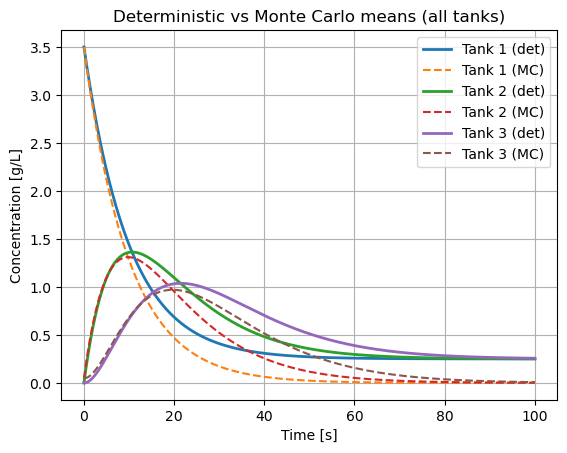

In [35]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
n_steps = 1000
t = np.arange(n_steps + 1) * dt

C1_det = np.zeros(n_steps + 1)
C2_det = np.zeros(n_steps + 1)
C3_det = np.zeros(n_steps + 1)

C1_det[0] = 3.5
C2_det[0] = 0.0
C3_det[0] = 0.0

Q = 100.0
V = 1000.0
k = Q / V
Cin = 0.25

for n in range(n_steps):
    C1_det[n+1] = C1_det[n] + dt * k * (Cin - C1_det[n])
    C2_det[n+1] = C2_det[n] + dt * k * (C1_det[n] - C2_det[n])
    C3_det[n+1] = C3_det[n] + dt * k * (C2_det[n] - C3_det[n])

# Visualizations of ODE vs Monte Carlo means
plt.figure()
plt.plot(t, C1_det,  label="Tank 1 (det)", linewidth=2)
plt.plot(t, C1_mean, '--', label="Tank 1 (MC)")
plt.plot(t, C2_det,  label="Tank 2 (det)", linewidth=2)
plt.plot(t, C2_mean, '--', label="Tank 2 (MC)")
plt.plot(t, C3_det,  label="Tank 3 (det)", linewidth=2)
plt.plot(t, C3_mean, '--', label="Tank 3 (MC)")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Deterministic vs Monte Carlo means (all tanks)")
plt.legend()
plt.grid(True)
plt.show()


**1. Compare the Monte Carlo simulation results to the deterministic ODE
solution.**

The deterministic solution based on the average parameter value and the Monte Carlo means show good agreement between all three tanks.
For tank 1, both curves show the expected exponential decay from the initial concentration toward the inflow concentration. The Monte Carlo mean lies very close to the deterministic trajectory, with only minor deviations due to the sampling variability and the uniform parameter distributions used in the stochastic runs.

In tanks 2 and 3, the deterministic profiles capture the delayed rise and subsequent decay associated with the mixture transport through the tanks. The Monte Carlo means again follow these trends closely, but we can see small differences appear around the peak concentrations where the nonlinear coupling between tanks make the system slighlty more sensitive to parameter variability. Even so, the differences remain small relative to the overall values of the concentrations and the shapes of the curves are nearly identical.

Overall, the comparison demonstrates that the Monte Carlo simulation is both accurate and consistent with the deterministic ODE model. The group averages reproduce the deterministic trajectories, confirming that the stochastic forumlation is unbiased and that the numerical implementation correctly captures the underlying dynamics of the three-tank system.

**2. Evaluate accuracy, consistency, and computational efficiency of the stochastic approach.**

In terms of accuracy and consistency, the Monte Carlo means reproduce the deterministic ODE solution closely for all three tanks, indicating that the stochastic scheme is unbiased and numerically consistent with the underlying model. The main difference between the approaches lies in computational cost. The deterministic system needs to be integrated only once for a given parameter set, whereas the Monte Carlo approach requires 100 independent runs (or more) to obtain smooth statistics for the mean and variance. Thus, for the same time discretization, the stochastic method is roughly two orders of magnitude more expensive than a single deterministic solve, even though both produce nearly identical mean trajectories in this case.

**3. Discuss advantages and limitations of Monte Carlo methods versus deterministic ODE solutions.**

Deterministic ODE solutions are very efficient and provide an exact trajectory for a given set of parameters, which makes them ideal when the parameters are well known and the goal is to study the nominal system behavior. Their main limitation is that they do not directly quantify how parameter uncertainty affects the outputs. 
Monte Carlo simulations, on the other hand, are designed to handle uncertainty explicitly: they provide not only an estimate of the mean response but also standard deviation and confidence intervals, and they can represent the full distribution of possible outcomes. The trade-off is higher computational cost and sampling noise (many runs may be needed for converged statistics). 
In summary, deterministic ODEs are best for fast, precise predictions at fixed parameters, while Monte Carlo methods are best when uncertainty and variability are central to the analysis.

# Til sammendrag (slå sammen med oppgave 2 sammendrag)

In summary, the single tank-model demonstrates how parameter uncertainty influences the system behavior through Monte Carlo simulation, with the group mean closely following the analytical solution and the variability captured through standard deviations and confidence intervals. 
Extending the simulations to time-varying paramters shows how dynamic variations affect uncertainty without altering the mean decay behavior. Together, these results show how stochastic methods add to the deterministic ODE models by quantifying uncertainty and providing deeper insigt into system robustness and variability.